# Preparação dos PDFs

#Util
import pdftables_api

#PDF2csv
arq = '120_201812'
c = pdftables_api.Client('2y073aza9vzo')
c.csv('../../../../Downloads/'+arq+'.pdf', '../../../../Downloads/'+arq+'.csv') 

In [162]:
from tabula import read_pdf

arq = '23_201812'
df = read_pdf('../../../../Downloads/'+arq+'.pdf', columns=[128,240,353,421,516,583,636,712,765,820], encoding='utf-8', guess=False, pages='all', stream=True, pandas_options={'header': None})
df.to_csv('../../../../Downloads/'+arq+'.csv', sep=',', index=False)


import camelot

arq = '120_201811'
tables = camelot.read_pdf('../../../../Downloads/'+arq+'.pdf', flavor='stream')
#tables = camelot.read_pdf('../../../../Downloads/foo.pdf')
tables[0].df

#Usando xls gerado do smallpdf
import pandas as pd

arq = '120_201811'
xls = pd.ExcelFile('../../../../Downloads/'+arq+'-converted.xlsx')

df = pd.DataFrame()
for sheet in xls.sheet_names:
    df = df.append(pandas.read_excel(open('../../../../Downloads/'+arq+'-converted.xlsx','rb'), sheet_name=sheet, sort=False))

df

In [163]:
import pandas as pd

dt = pd.read_csv('../../../../Downloads/'+arq+'.csv', sep=',', header=5)#4
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 10 columns):
NOME                2628 non-null object
LOTAÇÃO             2532 non-null object
CARGO               2580 non-null object
FUNÇÃO              1182 non-null object
VÍNCULO             2581 non-null object
LEGAL TOTAL(R$)     2580 non-null object
DESC. TETO(R$)      144 non-null object
LEGAL DEVIDA(R$)    2580 non-null object
LEGAIS(R$)          2674 non-null object
DISPONÍVEL(R$)      2676 non-null object
dtypes: object(10)
memory usage: 213.4+ KB


In [164]:
dt.head(10)

,NOME,LOTAÇÃO,CARGO,FUNÇÃO,VÍNCULO,LEGAL TOTAL(R$),DESC. TETO(R$),LEGAL DEVIDA(R$),LEGAIS(R$),DISPONÍVEL(R$)
0,ABDIAS PEREIRA E SILVA,GABINETE DO DELEGADO GERAL,TECNICO EM CONTABILIDADE,NaN,ESTATUTARIO,"3.796,69",NaN,"3.796,69","240,39","3.556,30"
1,ABDON JOSE MUSSA NETO,DELEGACIAS DISTRITAIS,INVEST.DE POL. 4A.CL. PC­INV.IV,INV.DE POL.4a CL.,ESTATUTARIO,"10.636,46",NaN,"10.636,46","2.526,40","8.110,06"
2,ABELARDO MORAIS GASPAR,DIP DE ITACOATIARA,INVEST.DE POLICIA.1A.CL. PC­INV­I,NaN,ESTATUTARIO,"15.943,44",NaN,"15.943,44","3.303,96","12.639,48"
3,ABISAI MACHADO MENDES,ASSESSORIA,INVESTIGADOR DE POL.CL.ESPECIAL,NaN,ESTATUTARIO,"15.444,80",NaN,"15.444,80","4.292,56","11.152,24"
4,ABNER FERREIRA DE MIRANDA,DELEGACIAS DISTRITAIS,INVEST.DE POLICIA.1A.CL. PC­INV­I,NaN,ESTATUTARIO,"14.319,16",NaN,"14.319,16","3.011,80","11.307,36"
5,ABRAHAO SERRUYA,DELEGACIA ESPECIALIZADA,DELEGADO DE POLICIA 2A.CL.PC­DEL­II,NaN,ESTATUTARIO,"25.662,20",NaN,"25.662,20","7.757,45","17.904,75"
6,ABRAHIM JEZINI JUNIOR,DEPARTAMEN.DE POL.DO INTERIOR,INVEST.DE POL. 4A.CL. PC­INV.IV,NaN,ESTATUTARIO,"10.989,29",NaN,"10.989,29","1.965,84","9.023,45"
7,ABRAIM JACQUEMINUT DA SILVA,DELEGACIAS DISTRITAIS,INVESTIGADOR DE POL.CL.ESPECIAL,NaN,ESTATUTARIO,"13.216,40",NaN,"13.216,40","3.558,29","9.658,11"
8,ABY AKEL DOS SANTOS FORTE,DELEGACIAS DISTRITAIS,ESCRIVAO DE POL.3A.CL. PC­ESC­III,ESC.DE POL.4o CL,ESTATUTARIO,"14.951,61",NaN,"14.951,61","3.959,97","10.991,64"
9,ACACIA PACHECO DA SILVA DANTAS,DELEGACIA ESPECIALIZADA,DELEGADO DE POLICIA 1A.CL. PC­DEL­I,NaN,ESTATUTARIO,"28.446,93",NaN,"28.446,93","8.905,06","19.541,87"


In [165]:
#dropa os sem remuneração
#dt[ (dt['LEGAL TOTAL(R$)'].isnull())]
dt2 = dt.dropna(subset=['LEGAL TOTAL(R$)'])
dt2[ (dt2['LEGAL TOTAL(R$)'].isnull())]

,NOME,LOTAÇÃO,CARGO,FUNÇÃO,VÍNCULO,LEGAL TOTAL(R$),DESC. TETO(R$),LEGAL DEVIDA(R$),LEGAIS(R$),DISPONÍVEL(R$)


In [166]:
#Remove linhas com lixo
#dt2[dt2['DISPONÍVEL(R$)'] =='LÍQUIDO']
dt3 = dt2[dt2['DISPONÍVEL(R$)'] != 'LÍQUIDO']
#dt3[dt3['DISPONÍVEL(R$)'] =='DISPONÍVEL(R$)']
dt3 = dt3[dt3['DISPONÍVEL(R$)'] != 'DISPONÍVEL(R$)']
#dt3[dt3['DISPONÍVEL(R$)'] =='DISPONÍVEL(R$)']
dt3

,NOME,LOTAÇÃO,CARGO,FUNÇÃO,VÍNCULO,LEGAL TOTAL(R$),DESC. TETO(R$),LEGAL DEVIDA(R$),LEGAIS(R$),DISPONÍVEL(R$)
0,ABDIAS PEREIRA E SILVA,GABINETE DO DELEGADO GERAL,TECNICO EM CONTABILIDADE,NaN,ESTATUTARIO,"3.796,69",NaN,"3.796,69","240,39","3.556,30"
1,ABDON JOSE MUSSA NETO,DELEGACIAS DISTRITAIS,INVEST.DE POL. 4A.CL. PC­INV.IV,INV.DE POL.4a CL.,ESTATUTARIO,"10.636,46",NaN,"10.636,46","2.526,40","8.110,06"
2,ABELARDO MORAIS GASPAR,DIP DE ITACOATIARA,INVEST.DE POLICIA.1A.CL. PC­INV­I,NaN,ESTATUTARIO,"15.943,44",NaN,"15.943,44","3.303,96","12.639,48"
3,ABISAI MACHADO MENDES,ASSESSORIA,INVESTIGADOR DE POL.CL.ESPECIAL,NaN,ESTATUTARIO,"15.444,80",NaN,"15.444,80","4.292,56","11.152,24"
4,ABNER FERREIRA DE MIRANDA,DELEGACIAS DISTRITAIS,INVEST.DE POLICIA.1A.CL. PC­INV­I,NaN,ESTATUTARIO,"14.319,16",NaN,"14.319,16","3.011,80","11.307,36"
5,ABRAHAO SERRUYA,DELEGACIA ESPECIALIZADA,DELEGADO DE POLICIA 2A.CL.PC­DEL­II,NaN,ESTATUTARIO,"25.662,20",NaN,"25.662,20","7.757,45","17.904,75"
6,ABRAHIM JEZINI JUNIOR,DEPARTAMEN.DE POL.DO INTERIOR,INVEST.DE POL. 4A.CL. PC­INV.IV,NaN,ESTATUTARIO,"10.989,29",NaN,"10.989,29","1.965,84","9.023,45"
7,ABRAIM JACQUEMINUT DA SILVA,DELEGACIAS DISTRITAIS,INVESTIGADOR DE POL.CL.ESPECIAL,NaN,ESTATUTARIO,"13.216,40",NaN,"13.216,40","3.558,29","9.658,11"
8,ABY AKEL DOS SANTOS FORTE,DELEGACIAS DISTRITAIS,ESCRIVAO DE POL.3A.CL. PC­ESC­III,ESC.DE POL.4o CL,ESTATUTARIO,"14.951,61",NaN,"14.951,61","3.959,97","10.991,64"
9,ACACIA PACHECO DA SILVA DANTAS,DELEGACIA ESPECIALIZADA,DELEGADO DE POLICIA 1A.CL. PC­DEL­I,NaN,ESTATUTARIO,"28.446,93",NaN,"28.446,93","8.905,06","19.541,87"


In [167]:
#Renomeando colunas conforme exemplo
ex = pd.read_csv('./UEA/120_201705.csv', sep=';', header=0)
ex.columns
dt3.columns = ex.columns[0:10]
dt3

,NOME,LOTACAO,CARGO,FUNCAO,VINCULO,REMUNERACAO LEGAL TOTAL(R$),DESC.TETO(R$),REMUNERACAO LEGAL DEVIDA(R$),DESCONTOS LEGAIS(R$),LIQUIDO DISPONIVEL(R$)
0,ABDIAS PEREIRA E SILVA,GABINETE DO DELEGADO GERAL,TECNICO EM CONTABILIDADE,NaN,ESTATUTARIO,"3.796,69",NaN,"3.796,69","240,39","3.556,30"
1,ABDON JOSE MUSSA NETO,DELEGACIAS DISTRITAIS,INVEST.DE POL. 4A.CL. PC­INV.IV,INV.DE POL.4a CL.,ESTATUTARIO,"10.636,46",NaN,"10.636,46","2.526,40","8.110,06"
2,ABELARDO MORAIS GASPAR,DIP DE ITACOATIARA,INVEST.DE POLICIA.1A.CL. PC­INV­I,NaN,ESTATUTARIO,"15.943,44",NaN,"15.943,44","3.303,96","12.639,48"
3,ABISAI MACHADO MENDES,ASSESSORIA,INVESTIGADOR DE POL.CL.ESPECIAL,NaN,ESTATUTARIO,"15.444,80",NaN,"15.444,80","4.292,56","11.152,24"
4,ABNER FERREIRA DE MIRANDA,DELEGACIAS DISTRITAIS,INVEST.DE POLICIA.1A.CL. PC­INV­I,NaN,ESTATUTARIO,"14.319,16",NaN,"14.319,16","3.011,80","11.307,36"
5,ABRAHAO SERRUYA,DELEGACIA ESPECIALIZADA,DELEGADO DE POLICIA 2A.CL.PC­DEL­II,NaN,ESTATUTARIO,"25.662,20",NaN,"25.662,20","7.757,45","17.904,75"
6,ABRAHIM JEZINI JUNIOR,DEPARTAMEN.DE POL.DO INTERIOR,INVEST.DE POL. 4A.CL. PC­INV.IV,NaN,ESTATUTARIO,"10.989,29",NaN,"10.989,29","1.965,84","9.023,45"
7,ABRAIM JACQUEMINUT DA SILVA,DELEGACIAS DISTRITAIS,INVESTIGADOR DE POL.CL.ESPECIAL,NaN,ESTATUTARIO,"13.216,40",NaN,"13.216,40","3.558,29","9.658,11"
8,ABY AKEL DOS SANTOS FORTE,DELEGACIAS DISTRITAIS,ESCRIVAO DE POL.3A.CL. PC­ESC­III,ESC.DE POL.4o CL,ESTATUTARIO,"14.951,61",NaN,"14.951,61","3.959,97","10.991,64"
9,ACACIA PACHECO DA SILVA DANTAS,DELEGACIA ESPECIALIZADA,DELEGADO DE POLICIA 1A.CL. PC­DEL­I,NaN,ESTATUTARIO,"28.446,93",NaN,"28.446,93","8.905,06","19.541,87"


In [168]:
#Remove pontos dos números
dt3[' REMUNERACAO LEGAL DEVIDA(R$)'] = dt3[' REMUNERACAO LEGAL DEVIDA(R$)'].str.replace('.','')

In [169]:
# Salva o csv
dt3.to_csv('./POLC/'+arq+'.csv', sep=';', index=False)

# Preparação dos Dados

In [27]:
rec_uea_2 = [
            "26.555.677,39",
            "31.449.583,22",
            "26.223.407,92",
            "26.621.829,99",
            "34.420.360,39",
            "31.444.022,33",
            "38.876.482,68",
            "37.687.538,55",
            "28.294.671,07",
            "33.287.896,17",
            "31.833.158,35",
            "35.787.655,65",
            "31.604.565,20",
            "32.065.355,80",
            "28.366.555,37",
            "31.662.439,91",
            "39.685.276,64",
            "35.676.723,52",
            "41.721.580,69",
            "36.269.955,94",
            "0,0"
            ]

In [1]:
#Abrir arquivo
import pandas as pd

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


path = 'UEA'
arqs = ['120_201705.csv',
        '120_201706.csv',
        '120_201707.csv',
        '120_201708.csv',
        '120_201709.csv',
        '120_201710.csv',
        '120_201711.csv',
        '120_201712.csv',
        '120_201801.csv',
        '120_201802.csv',
        '120_201803.csv',
        '120_201804.csv',
        '120_201805.csv',
        '120_201806.csv',
        '120_201807.csv',
        '120_201808.csv',
        '120_201809.csv',
        '120_201810.csv',
        '120_201811.csv',
        '120_201812.csv',
        '120_201901.csv',
        '120_201902.csv',
        '120_201903.csv',
        '120_201904.csv',
        '120_201905.csv',
        '120_201906.csv',
        '120_201907.csv',
        '120_201908.csv'
       ]

ds_2017 = []
for arq in arqs:
    ds_2017.append(pd.read_csv(path+'/'+arq, sep=';', header=0))

path = 'POLC'
arqs = ['23_201705.csv',
        '23_201706.csv',
        '23_201707.csv',
        '23_201708.csv',
        '23_201709.csv',
        '23_201710.csv',
        '23_201711.csv',
        '23_201712.csv',
        '23_201801.csv',
        '23_201802.csv',
        '23_201803.csv',
        '23_201804.csv',
        '23_201805.csv',
        '23_201806.csv',
        '23_201807.csv',
        '23_201808.csv',
        '23_201809.csv',
        '23_201810.csv',
        '23_201811.csv',
        '23_201812.csv',
        '23_201901.csv', 
        '23_201902.csv',
        '23_201903.csv', 
        '23_201904.csv',
        '23_201905.csv',
        '23_201906.csv',
        '23_201907.csv',
        '23_201908.csv'
       ]
ds_polc_2017 = []
for arq in arqs:
    ds_polc_2017.append(pd.read_csv(path+'/'+arq, sep=';', header=0))

labelx = ['mai/2017',
          'jun/2017', 
          'jul/2017', 
          'ago/2017', 
          'set/2017', 
          'out/2017', 
          'nov/2017', 
          'dez/2017', 
          'jan/2018', 
          'fev/2018', 
          'mar/2018', 
          'abr/2018',
          'mai/2018',
          'jun/2018',
          'jul/2018',
          'ago/2018',
          'set/2018',
          'out/2018',
          'nov/2018',
          'dez/2018',
          'jan/2019',
          'fev/2019',
          'mar/2019',
          'abr/2019',
          'mai/2019',
          'jun/2019',
          'jul/2019',
          'ago/2019'
         ]

receitas = [
            "1.330.260.475,27",
            "1.185.933.519,89",
            "1.408.706.525,29",
            "1.291.113.555,15",
            "1.355.983.773,65",
            "1.240.845.842,77",
            "1.309.526.274,65",
            "1.603.711.612,75",
            "1.270.568.731,13",
            "1.592.184.015,91",
            "1.621.230.227,67",
            "1.360.982.989,79",
            "1.788.046.956,09",
            "1.301.545.064,36",
            "1.325.219.299,05",
            "1.447.630.663,32",
            "1.493.203.257,26",
            "1.368.355.658,94",
            "1.524.496.568,01",
            "1.924.855.008,25",
            "1.424.247.870,21",
            "1.580.414.897,01",
            "1.463.441.733,48",
            "1.379.073.084,33",
            "1.552.793.106,80",
            "1.382.382.545,92",
            "1.551.180.372,95",
            "1.586.507.106,90"
           ]
rec_uea = [
            "27.466.608,35",
            "32.611.257,65",
            "26.757.117,24",
            "30.308.832,15",
            "26.907.194,33",
            "19.490.509,98",
            "28.024.810,32",
            "42.733.898,85",
            "16.602.523,14",
            "26.950.582,04",
            "29.206.595,86",
            "31.909.458,20",
            "33.881.430,52",
            "31.883.521,34",
            "37.594.685,31",
            "30.709.244,70",
            "33.037.631,26",
            "31.838.057,03",
            "31.678.155,98",
            "54.321.220,36",
            "107.332,56",
            "35.561.241,32",
            "27.964.770,67",
            "40.520.891,27",
            "37.560.641,57",
            "45.826.531,32",
            "21.906.710,80",
            "36.679.716,97"
            ]
receitas = [float(s.replace(".","").replace(",",".")) for s in receitas]
rec_uea = [float(s.replace(".","").replace(",",".")) for s in rec_uea]
#receitas = receitas.replace(".","").replace(",",".").astype(np.float)

In [2]:
for ds in ds_2017:
    #COnverte remuneracao de texto para float
    ds[' REMUNERACAO LEGAL DEVIDA(R$)'] = ds[' REMUNERACAO LEGAL DEVIDA(R$)'].str.replace(',','.').astype(float)
    ds.rename(columns={' REMUNERACAO LEGAL DEVIDA(R$)': 'REMUNERACAO_BRUTA'}, inplace=True)
    try:
        ds.drop(['Unnamed: 10'], axis=1, inplace=True)
    except:
        print('Sem Coluna Unnamed')
    ds['LOTACAO'] = ds['LOTACAO'].str.replace('ESCOLA SUPERIOR DE TECNOLOGIA','ESCOLA SUP.DE TECNOLOGIA-EST')

for ds in ds_polc_2017:
    #COnverte remuneracao de texto para float
    ds[' REMUNERACAO LEGAL DEVIDA(R$)'] = ds[' REMUNERACAO LEGAL DEVIDA(R$)'].str.replace(',','.').astype(float)
    ds.rename(columns={' REMUNERACAO LEGAL DEVIDA(R$)': 'REMUNERACAO_BRUTA'}, inplace=True)
    try:
        ds.drop(['Unnamed: 10'], axis=1, inplace=True)
    except:
        print('Sem Coluna Unnamed')

Sem Coluna Unnamed
Sem Coluna Unnamed
Sem Coluna Unnamed
Sem Coluna Unnamed


In [3]:
uea_ult = ds_2017[-1]
polc_ult = ds_polc_2017[-1]
#polc_mar.head()
polc_ult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439 entries, 0 to 2438
Data columns (total 10 columns):
NOME                           2439 non-null object
LOTACAO                        2439 non-null object
CARGO                          2439 non-null object
FUNCAO                         1069 non-null object
VINCULO                        2439 non-null object
REMUNERACAO LEGAL TOTAL(R$)    2439 non-null object
DESC.TETO(R$)                  83 non-null object
REMUNERACAO_BRUTA              2439 non-null float64
DESCONTOS LEGAIS(R$)           2439 non-null object
LIQUIDO DISPONIVEL(R$)         2439 non-null object
dtypes: float64(1), object(9)
memory usage: 190.6+ KB


# Quantidades de Funcionários

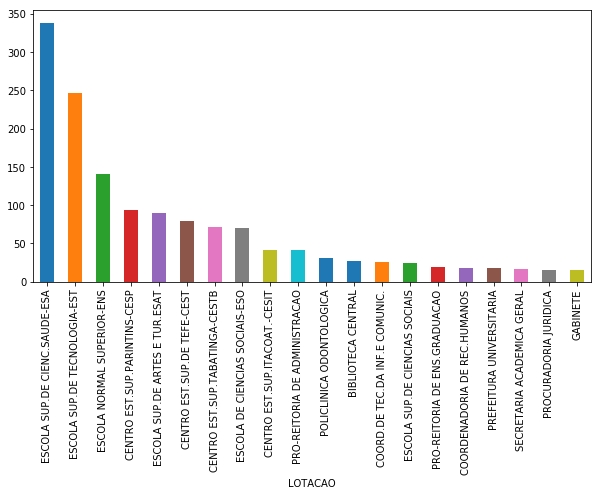

In [4]:
#Qtde de Funcionarios por LOTACAO
uea_ult.groupby('LOTACAO').count()['NOME'].sort_values(ascending=False)[:20].plot(kind='bar', figsize=(10,5))

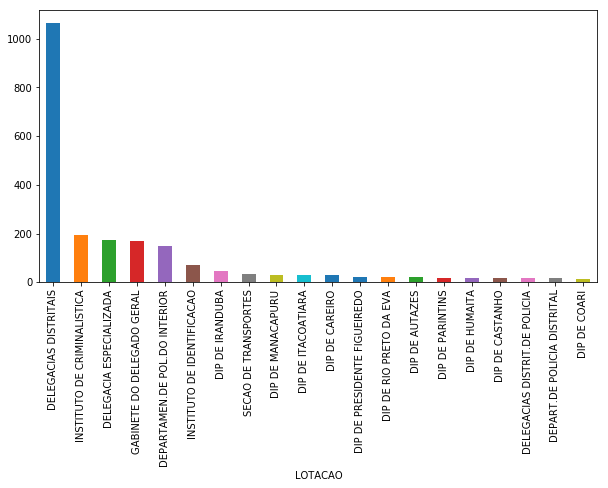

In [5]:
#Qtde de Funcionarios por LOTACAO
polc_ult.groupby('LOTACAO').count()['NOME'].sort_values(ascending=False)[:20].plot(kind='bar', figsize=(10,5))

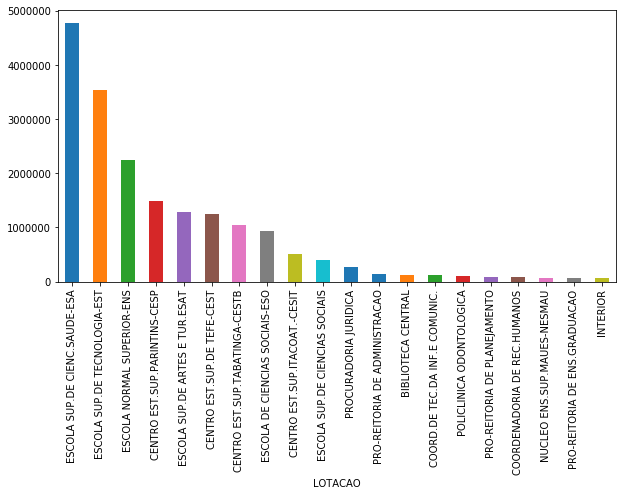

In [6]:
#Folha Total por LOTACAO
uea_ult.groupby('LOTACAO').sum().sort_values('REMUNERACAO_BRUTA',ascending=False)['REMUNERACAO_BRUTA'][:20].plot(kind='bar', figsize=(10,5))

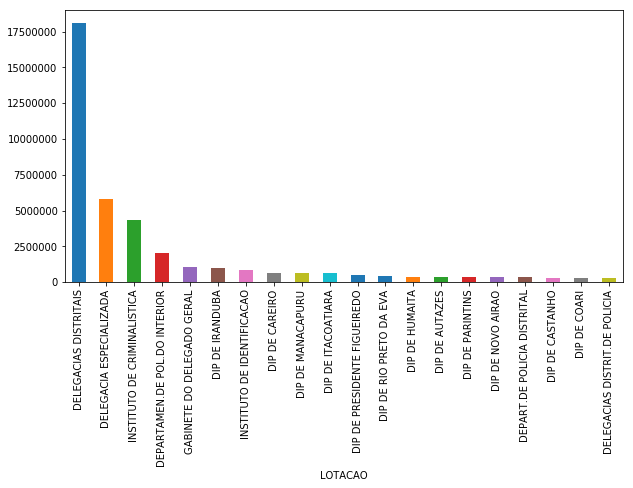

In [7]:
#Folha Total por LOTACAO
plt.ticklabel_format(style = 'plain')
polc_ult.groupby('LOTACAO').sum().sort_values('REMUNERACAO_BRUTA',ascending=False)['REMUNERACAO_BRUTA'][:20].plot(kind='bar', figsize=(10,5))

# Remunerações

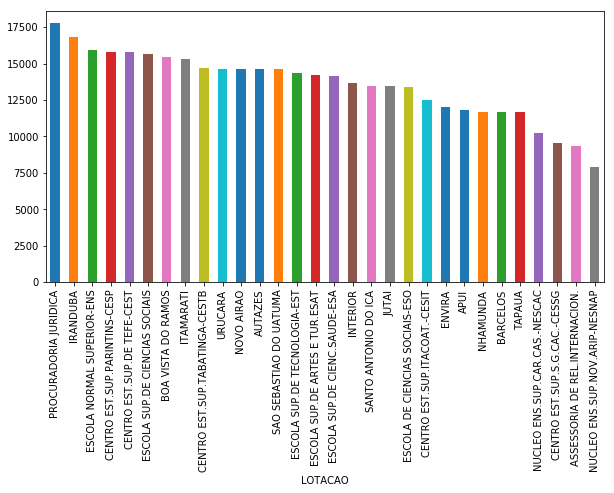

In [8]:
#Media da Remuneracao por Unidade
uea_rpp = uea_ult.groupby('LOTACAO').sum()/uea_ult.groupby('LOTACAO').count()
uea_rpp.sort_values('REMUNERACAO_BRUTA',ascending=False)['REMUNERACAO_BRUTA'][:30].plot(kind='bar', figsize=(10,5))

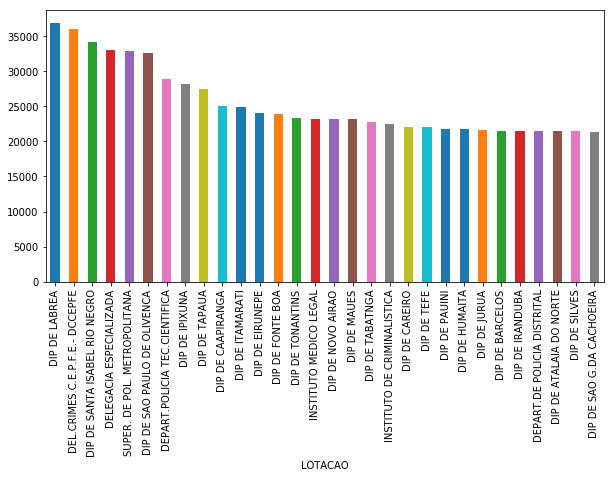

In [9]:
#Media da Remuneracao por Unidade
polc_rpp = polc_ult.groupby('LOTACAO').sum()/polc_ult.groupby('LOTACAO').count()
polc_rpp.sort_values('REMUNERACAO_BRUTA',ascending=False)['REMUNERACAO_BRUTA'][:30].plot(kind='bar', figsize=(10,5))

In [10]:
#jan.groupby('LOTACAO').mean().sort_values('REMUNERACAO LEGAL TOTAL(R$)',ascending=False)['REMUNERACAO LEGAL TOTAL(R$)'][:20].plot(kind='bar', figsize=(10,5))

uea_avg = uea_ult.groupby('LOTACAO').mean()
uea_std = uea_ult.groupby('LOTACAO').std()

uea_avg['std'] = uea_std['REMUNERACAO_BRUTA']

uea_avg = uea_avg.sort_values('REMUNERACAO_BRUTA',ascending=False)

uea_avg['std'].fillna(0,inplace=True)



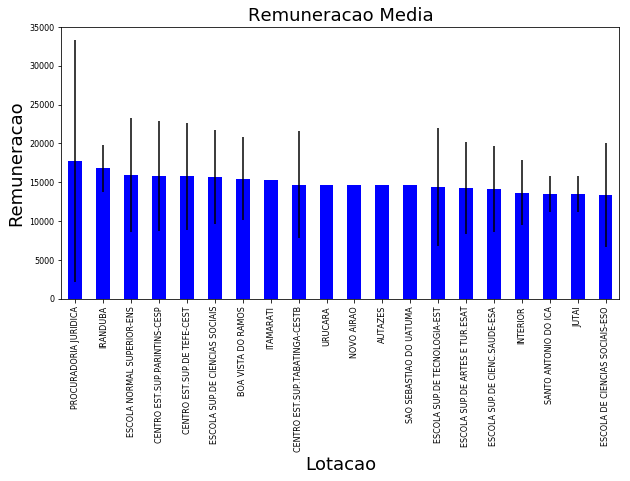

In [11]:
p = uea_avg['REMUNERACAO_BRUTA'][0:20].plot(figsize=(10,5),legend=False,kind="bar",color="blue",fontsize=8,yerr=uea_avg['std']);
p.set_title("Remuneracao Media", fontsize=18);
p.set_xlabel("Lotacao", fontsize=18);
p.set_ylabel("Remuneracao", fontsize=18);
#p.set_ylim(0,1800);


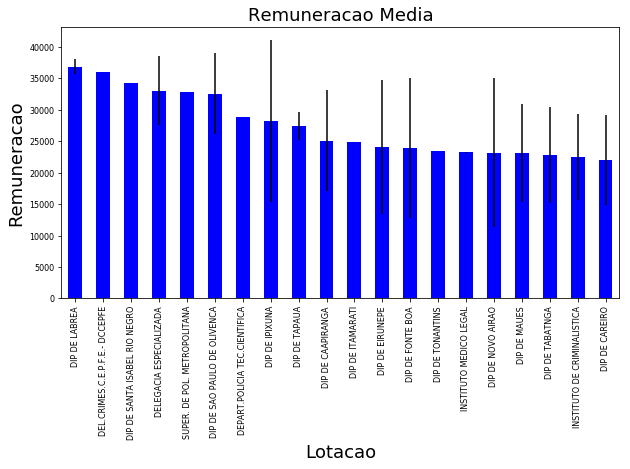

In [12]:
polc_avg = polc_ult.groupby('LOTACAO').mean()
polc_std = polc_ult.groupby('LOTACAO').std()

polc_avg['std'] = polc_std['REMUNERACAO_BRUTA']

polc_avg = polc_avg.sort_values('REMUNERACAO_BRUTA',ascending=False)

polc_avg['std'].fillna(0,inplace=True)

p = polc_avg['REMUNERACAO_BRUTA'][0:20].plot(figsize=(10,5),legend=False,kind="bar",color="blue",fontsize=8,yerr=polc_avg['std']);
p.set_title("Remuneracao Media", fontsize=18);
p.set_xlabel("Lotacao", fontsize=18);
p.set_ylabel("Remuneracao", fontsize=18);

# Comparativo UEA x POLC

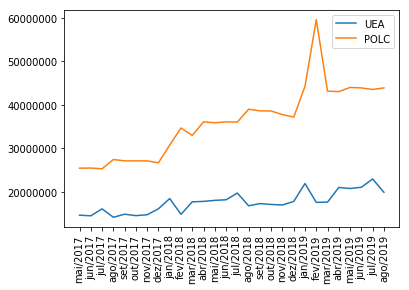

In [13]:
uea_tots = []
for ds in ds_2017:
    uea_tots.append(ds['REMUNERACAO_BRUTA'].sum())

polc_tots = []
for ds in ds_polc_2017:
    polc_tots.append(ds['REMUNERACAO_BRUTA'].sum())

#plt.axis((0,10,10000000,20000000))

plt.ticklabel_format(style = 'plain')
plt.plot(uea_tots, label = "UEA")
plt.plot(polc_tots, label = "POLC")
plt.legend(loc=0)
ax = plt.xticks(range(len(uea_tots)),labelx, rotation = 90)

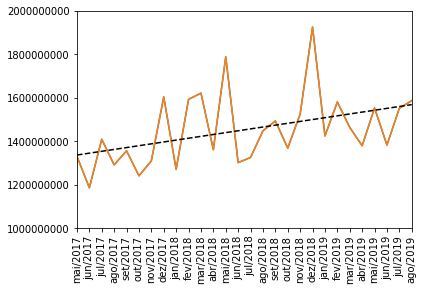

In [14]:
from scipy.interpolate import UnivariateSpline
plt.ticklabel_format(style = 'plain')
plt.axis((0,10,1000000000,2000000000))
plt.plot(receitas,label = "Receitas")
#s = UnivariateSpline(range(len(receitas)), receitas, s=20)
#xs = np.linspace(0, len(receitas), 100)
#ys = s(xs)
#plt.plot(ys)
fit = np.polyfit(range(len(receitas)), receitas,1)
fit_fn = np.poly1d(fit)
plt.plot(range(len(receitas)),receitas,fit_fn(range(len(receitas))),'--k')
#plt.curve(coef(receitas)[1]+coef(receitas)[2]*x,add=TRUE,col = "blue",lwd=2)
ax = plt.xticks(range(len(uea_tots)),labelx, rotation = 90)

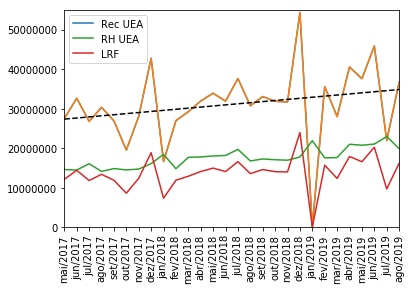

In [15]:
plt.ticklabel_format(style = 'plain')
plt.axis((0,10,0,55000000))
plt.plot(rec_uea,label = "Rec UEA")
fit = np.polyfit(range(len(rec_uea)), rec_uea,1)
fit_fn = np.poly1d(fit)
plt.plot(range(len(rec_uea)),rec_uea,fit_fn(range(len(rec_uea))),'--k')
#RH
plt.plot(uea_tots, label = "RH UEA")
lim_lrf = [i*0.441 for i in rec_uea]
plt.plot(lim_lrf, label = "LRF")
plt.legend(loc=0)
ax = plt.xticks(range(len(uea_tots)),labelx, rotation = 90)

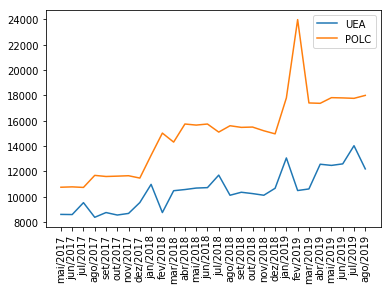

In [16]:
uea_tots = []
for ds in ds_2017:
    uea_tots.append(ds['REMUNERACAO_BRUTA'].mean())

polc_tots = []
for ds in ds_polc_2017:
    polc_tots.append(ds['REMUNERACAO_BRUTA'].mean())

#plt.axis((0,10,10000000,20000000))

plt.plot(uea_tots, label = "UEA")
plt.plot(polc_tots, label = "POLC")
plt.legend(loc=0)
ax = plt.xticks(range(len(uea_tots)),labelx, rotation = 90)

In [17]:
print(uea_ult['REMUNERACAO_BRUTA'].sum())
print(polc_ult['REMUNERACAO_BRUTA'].sum())

19857123.09
43885681.32


In [18]:
uea_ult.sort_values('REMUNERACAO_BRUTA',ascending=False)[:40]

,NOME,LOTACAO,CARGO,FUNCAO,VINCULO,REMUNERACAO LEGAL TOTAL(R$),DESC.TETO(R$),REMUNERACAO_BRUTA,DESCONTOS LEGAIS(R$),LIQUIDO DISPONIVEL(R$)
462,ERIVERTON RESENDE MONTE,PROCURADORIA JURIDICA,PROCURADOR JUR.2A.CLASSE-NS.132.19,PROCURADOR JURIDICO,ESTATUTARIO,"42466,45","36,11",42430.34,"13522,82","28907,52"
1375,ROBERIO DOS SANTOS PEREIRA BRAGA,PROCURADORIA JURIDICA,P.AUT-U,NaN,ESTATUTARIO,"42845,04","3481,98",39363.06,"12711,13","26651,93"
292,CLEINALDO DE ALMEIDA COSTA,ESCOLA SUP.DE CIENC.SAUDE-ESA,PROF.DOUTOR ADJ.C 40HS-PD.111.20,REITOR,ESTATUTARIO,"45455,02","9992,80",35462.22,"10009,32","25452,90"
85,ALY NASSER ABRAHIM BALLUT FILHO,PROCURADORIA JURIDICA,PROCURADOR JUR.1A.CLASSE-NS.131.20,PROCURADOR JURIDICO,ESTATUTARIO,"35527,96","65,74",35462.22,"10523,00","24939,22"
924,LUCIANA ELVAS PINHEIRO COSTA,PROCURADORIA JURIDICA,PROCURADOR JUR.1A.CLASSE-NS.131.20,NaN,ESTATUTARIO,"35527,96","65,74",35462.22,"11658,72","23803,50"
981,MARCELO CARVALHO DA SILVA,PROCURADORIA JURIDICA,PROCURADOR JUR.1A.CLASSE-NS.131.20,PROCURADOR,ESTATUTARIO,"35527,96","65,74",35462.22,"11606,59","23855,63"
1239,PATRICIA MELCHIONNA ALBUQUERQUE,ESCOLA SUP.DE TECNOLOGIA-EST,PROF.DOUTOR ASSOC.A 40HS-PA.111.20,COORDENADOR UEA 4,ESTATUTARIO,"33703,56",NaN,33703.56,"10185,65","23517,91"
8,ADEMIR CASTRO E SILVA,CENTRO EST.SUP.PARINTINS-CESP,PROFESSOR TITULAR 40HS-PT.111.20,PROFESSOR ADJUNTO,ESTATUTARIO,"32780,07",NaN,32780.07,"10431,06","22349,01"
152,ANIZIO DE ARAUJO CAVALCANTE,CENTRO EST.SUP.ITACOAT.-CESIT,PROFESSOR TITULAR 40HS-PT.111.20,PROFESSOR ADJUNTO,ESTATUTARIO,"32603,50",NaN,32603.50,"10047,02","22556,48"
633,IATICARA OLIVEIRA DA SILVA,CENTRO EST.SUP.TABATINGA-CESTB,PROF.MESTRE ASSIST.D 40HS-PM.111.20,PROF MESTRE,ESTATUTARIO,"31598,46",NaN,31598.46,"6938,87","24659,59"


([<matplotlib.axis.XTick at 0x7fd234026ac8>,
 <a list of 2 Text xticklabel objects>)

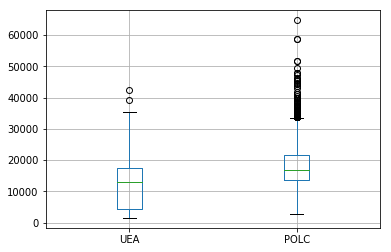

In [22]:
#uea_mar.boxplot()
pd.concat([uea_ult['REMUNERACAO_BRUTA'], polc_ult['REMUNERACAO_BRUTA']], axis=1).boxplot()
plt.xticks([1, 2], ['UEA', 'POLC'])

/home/mauricio/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


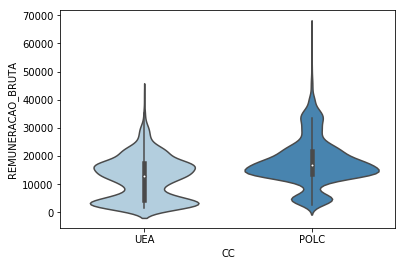

In [23]:
import seaborn as sns
#sns.violinplot(x=uea_mar['LOTACAO'], y=uea_mar['REMUNERACAO_BRUTA'], palette="Blues")

uea = uea_ult.assign(CC="UEA")
polc = polc_ult.assign(CC="POLC")
cdf = pd.concat([uea,polc])

#cdf.head()
sns.violinplot(x=cdf["CC"], y=cdf['REMUNERACAO_BRUTA'], palette="Blues")
#sns.violinplot( y=polc_mar['REMUNERACAO_BRUTA'], palette="Blues")

In [24]:
#sns.violinplot(x=polc_mar['LOTACAO'], y=polc_mar['REMUNERACAO_BRUTA'], palette="Blues")

In [25]:
uea_ult.query("REMUNERACAO_BRUTA > 30000").sort_values('REMUNERACAO_BRUTA',ascending=False)
#polc_ult.query("REMUNERACAO_BRUTA > 30000").sort_values('REMUNERACAO_BRUTA',ascending=False)

,NOME,LOTACAO,CARGO,FUNCAO,VINCULO,REMUNERACAO LEGAL TOTAL(R$),DESC.TETO(R$),REMUNERACAO_BRUTA,DESCONTOS LEGAIS(R$),LIQUIDO DISPONIVEL(R$)
462,ERIVERTON RESENDE MONTE,PROCURADORIA JURIDICA,PROCURADOR JUR.2A.CLASSE-NS.132.19,PROCURADOR JURIDICO,ESTATUTARIO,"42466,45","36,11",42430.34,"13522,82","28907,52"
1375,ROBERIO DOS SANTOS PEREIRA BRAGA,PROCURADORIA JURIDICA,P.AUT-U,NaN,ESTATUTARIO,"42845,04","3481,98",39363.06,"12711,13","26651,93"
924,LUCIANA ELVAS PINHEIRO COSTA,PROCURADORIA JURIDICA,PROCURADOR JUR.1A.CLASSE-NS.131.20,NaN,ESTATUTARIO,"35527,96","65,74",35462.22,"11658,72","23803,50"
85,ALY NASSER ABRAHIM BALLUT FILHO,PROCURADORIA JURIDICA,PROCURADOR JUR.1A.CLASSE-NS.131.20,PROCURADOR JURIDICO,ESTATUTARIO,"35527,96","65,74",35462.22,"10523,00","24939,22"
292,CLEINALDO DE ALMEIDA COSTA,ESCOLA SUP.DE CIENC.SAUDE-ESA,PROF.DOUTOR ADJ.C 40HS-PD.111.20,REITOR,ESTATUTARIO,"45455,02","9992,80",35462.22,"10009,32","25452,90"
981,MARCELO CARVALHO DA SILVA,PROCURADORIA JURIDICA,PROCURADOR JUR.1A.CLASSE-NS.131.20,PROCURADOR,ESTATUTARIO,"35527,96","65,74",35462.22,"11606,59","23855,63"
1239,PATRICIA MELCHIONNA ALBUQUERQUE,ESCOLA SUP.DE TECNOLOGIA-EST,PROF.DOUTOR ASSOC.A 40HS-PA.111.20,COORDENADOR UEA 4,ESTATUTARIO,"33703,56",NaN,33703.56,"10185,65","23517,91"
8,ADEMIR CASTRO E SILVA,CENTRO EST.SUP.PARINTINS-CESP,PROFESSOR TITULAR 40HS-PT.111.20,PROFESSOR ADJUNTO,ESTATUTARIO,"32780,07",NaN,32780.07,"10431,06","22349,01"
152,ANIZIO DE ARAUJO CAVALCANTE,CENTRO EST.SUP.ITACOAT.-CESIT,PROFESSOR TITULAR 40HS-PT.111.20,PROFESSOR ADJUNTO,ESTATUTARIO,"32603,50",NaN,32603.50,"10047,02","22556,48"
633,IATICARA OLIVEIRA DA SILVA,CENTRO EST.SUP.TABATINGA-CESTB,PROF.MESTRE ASSIST.D 40HS-PM.111.20,PROF MESTRE,ESTATUTARIO,"31598,46",NaN,31598.46,"6938,87","24659,59"
